## Step 1 - Load Dataset

### import Libraias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\rames\Downloads\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Description about Over all Statistics

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Finding Null Values

In [7]:
columns = df.columns

In [8]:
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df.groupby('sex')[['age',"bmi","children","charges"]].mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [15]:
df.groupby('smoker')[['age',"bmi","children","charges"]].mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [16]:
df.groupby('region')[['age',"bmi","children","charges"]].mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


# checking Noisy Data

In [17]:
for i in df.columns:
    print(df[i].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


## Duplicated

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## Number of Unique Values in each and every feature

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Outliers Treatment

## Step 2 - Exploratory Data Analysis

* The main reason to analyse the data here is to:

* Explore the Data Distribution of each variable and also identify outliers. (i.e. Univariate)
* Explore the Relationships between each pair of Inputs and Output. (i.e. Bivariate

### 2.a. Explore the Data Distribution of each Variable

### -- continous data Distribution

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='charges', ylabel='Count'>

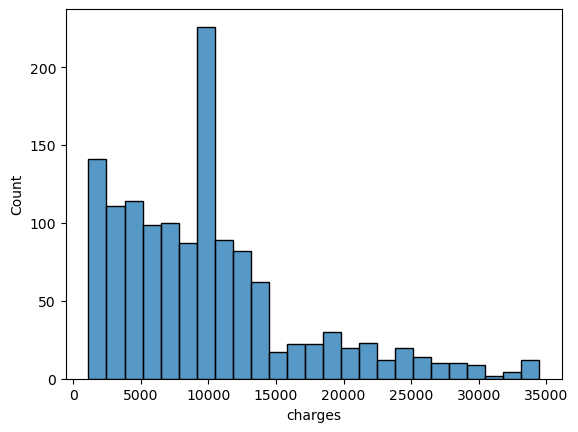

In [23]:
sns.histplot(data = df,x = "charges")

<Axes: xlabel='age', ylabel='Density'>

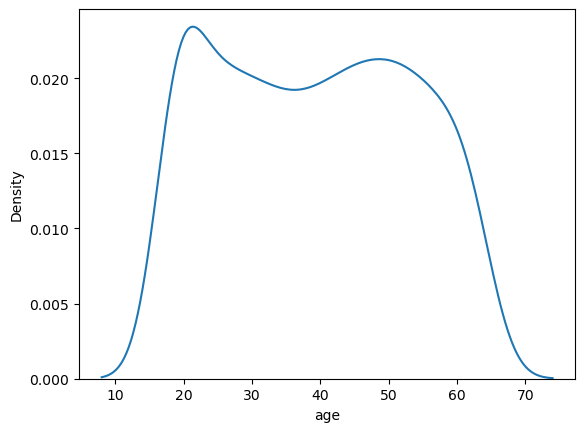

In [24]:
sns.kdeplot(data = df,x = 'age')

* Based on the data, the density indicates varying ages of individuals who have health insurance.
* There is a higher concentration of individuals between the ages of 10 and 25 with health insurance, followed by a decrease in * numbers at the age of 55, as per the provided data.

<Axes: xlabel='bmi', ylabel='Density'>

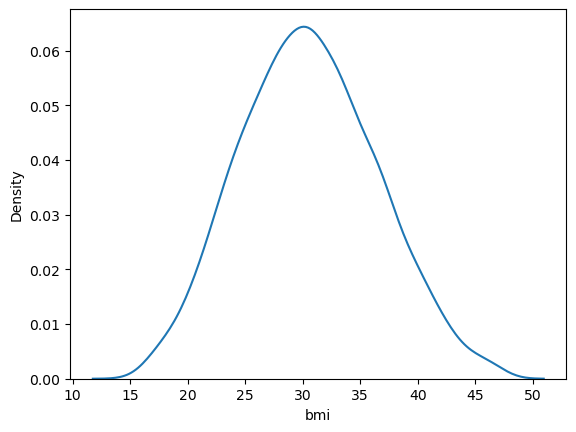

In [25]:
sns.kdeplot(data = df,x = 'bmi')

* The plot above illustrates the BMI distribution among insurance payers.

* This plot illustrates the count of children whose parents either have or are paying for health insurance.
* As observed, there is a higher number of individuals who do not have children, as depicted in the data.

<Axes: xlabel='charges', ylabel='Density'>

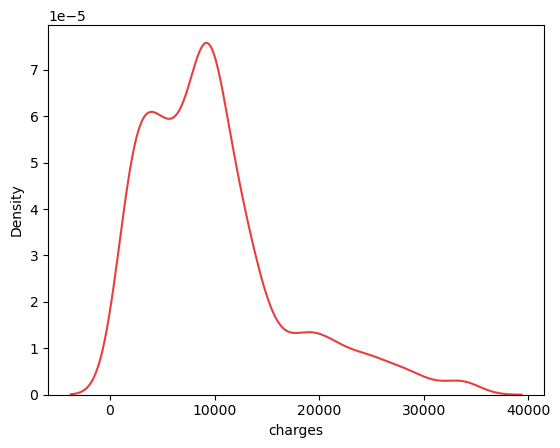

In [58]:
sns.kdeplot(data = df,x = 'charges')

* A significant portion of individuals is observed to be paying an insurance charge of 10,000 based on the data provided.
* There is a lower count of individuals paying an insurance charge within the range of 60,000 to 70,000, according to the data.
 

### categerical Data Distributiion

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

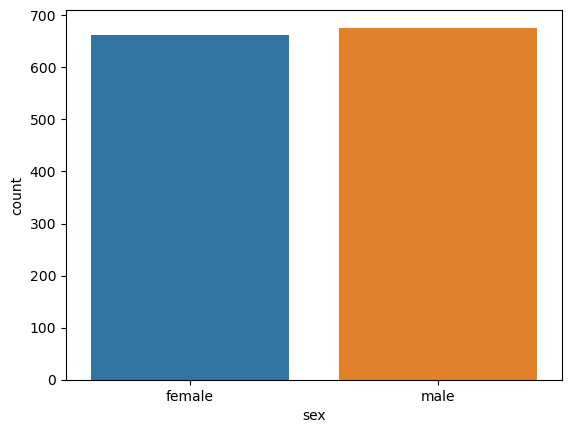

In [7]:
sns.countplot(data = df, x ='sex')

* Based on the provided data, it appears that there are more males with health insurance compared to females.


<Axes: xlabel='smoker', ylabel='count'>

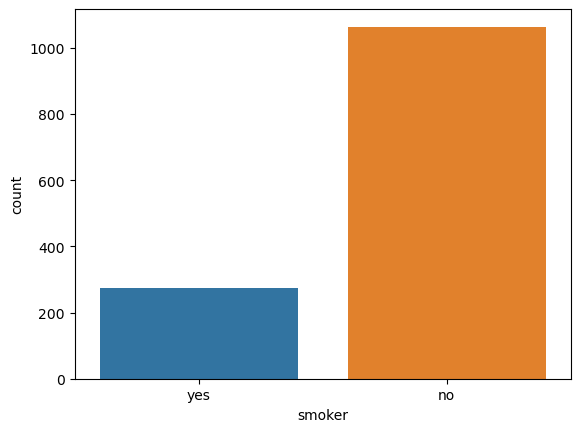

In [30]:
sns.countplot(data = df,x = 'smoker')

* Based on the given data, fewer people have the habit of smoking


<Axes: xlabel='region', ylabel='count'>

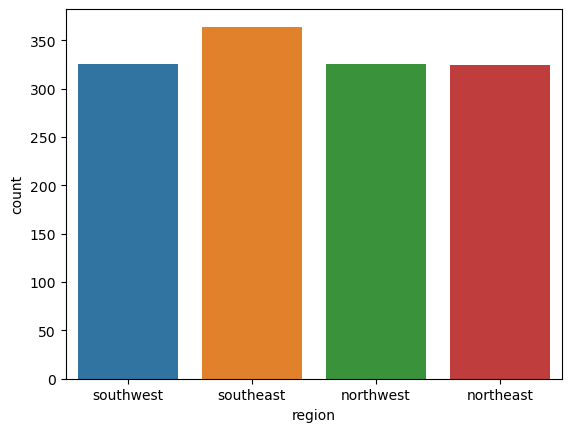

In [31]:
sns.countplot(data = df,x = 'region')

* The majority of individuals holding health insurance are from the southeast region, according to the provided data.
* In both the northwest and northeast regions, the number of individuals paying insurance charges is nearly identical, according * to the data provided.

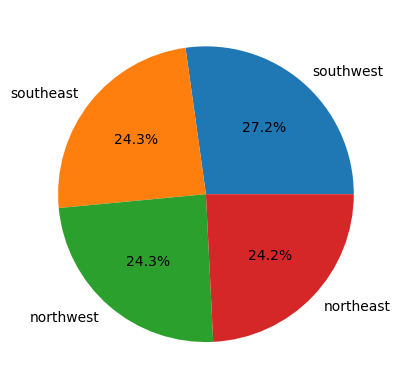

In [32]:
plt.pie(df['region'].value_counts(),labels = df['region'].unique(),autopct = '%1.1f%%')
plt.show()

* most of the rigion southwest high and southeast and nortwest are some equal northeast some below

### 2.b Identifying Outliers in each Variable

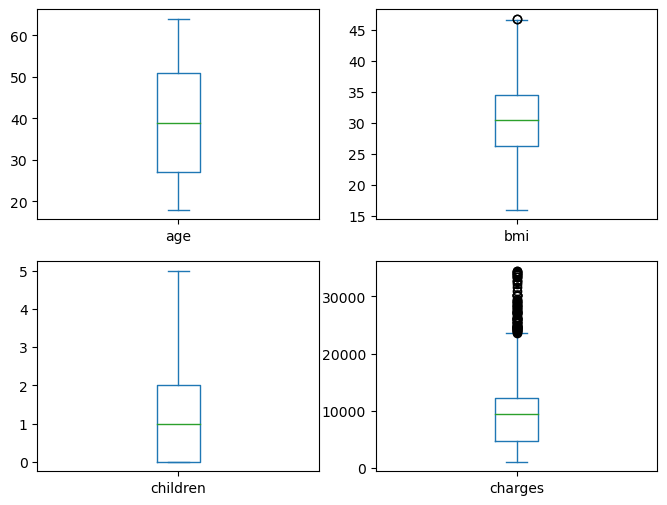

In [33]:
df.plot(kind="box",subplots=True, figsize=(8,6),layout=(2,2))
plt.show()

### 3.c  Explore the Relationships between each pair of Inputs and Output

* continous vs continous = scatter plot
* continous vs categorical = Box plot
* cat vs cat = Grouped Bar PLot

<Axes: xlabel='age', ylabel='charges'>

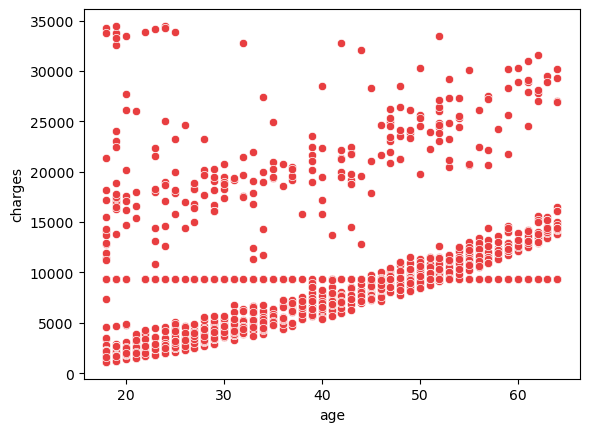

In [61]:
sns.scatterplot(data = df , x = "age",y = "charges")

<Axes: title={'center': 'charges'}, xlabel='sex'>

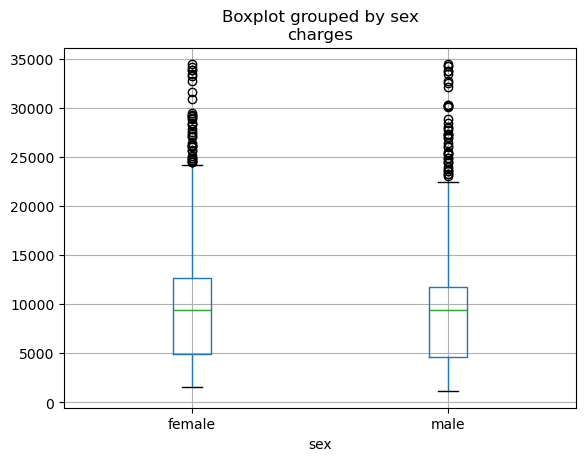

In [38]:
df.boxplot(by = "sex",column = "charges")

<Axes: xlabel='bmi', ylabel='charges'>

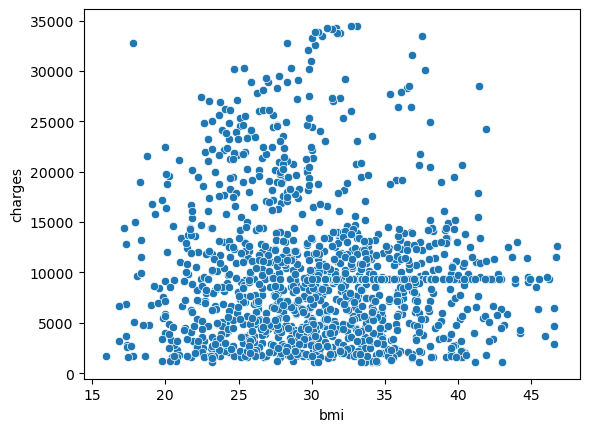

In [39]:
sns.scatterplot(data = df,x = 'bmi',y = "charges")

<Axes: xlabel='children', ylabel='charges'>

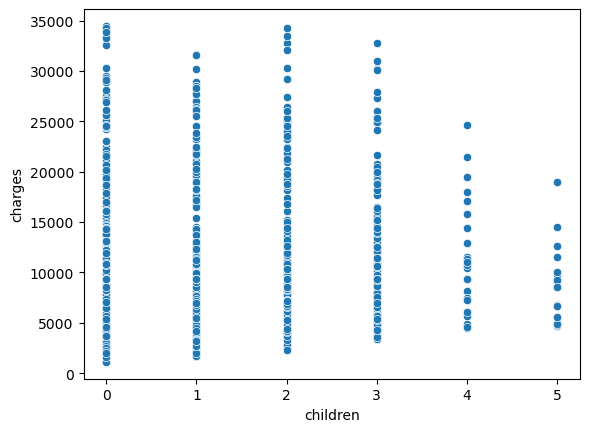

In [40]:
sns.scatterplot(data = df ,x = 'children',y = 'charges')

<Axes: title={'center': 'charges'}, xlabel='smoker'>

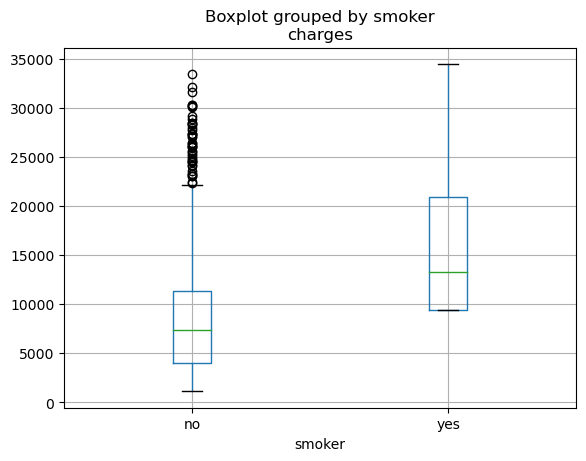

In [41]:
df.boxplot(by = 'smoker', column = 'charges')

<Axes: title={'center': 'charges'}, xlabel='region'>

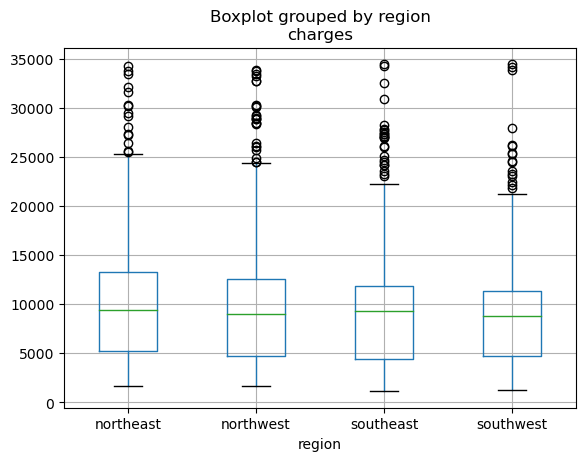

In [42]:
df.boxplot(by = 'region', column = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

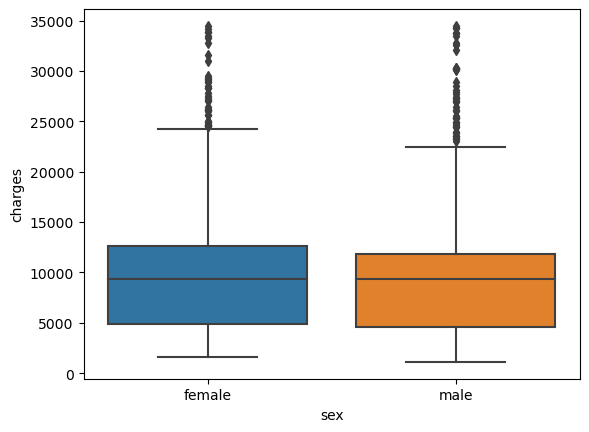

In [46]:
sns.boxplot(data=df, x='sex', y='charges')

<Axes: xlabel='smoker', ylabel='charges'>

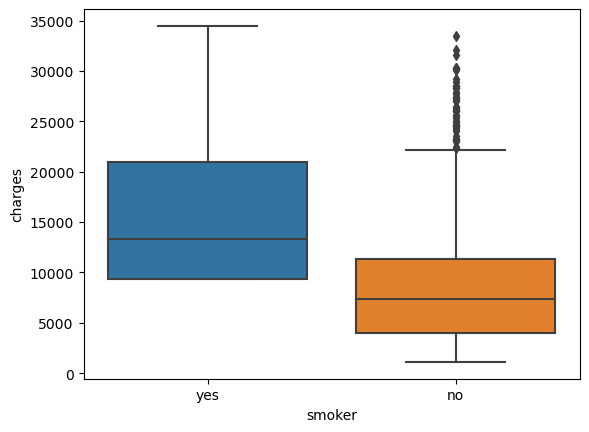

In [47]:
sns.boxplot(data=df, x='smoker', y='charges')

<Axes: xlabel='region', ylabel='charges'>

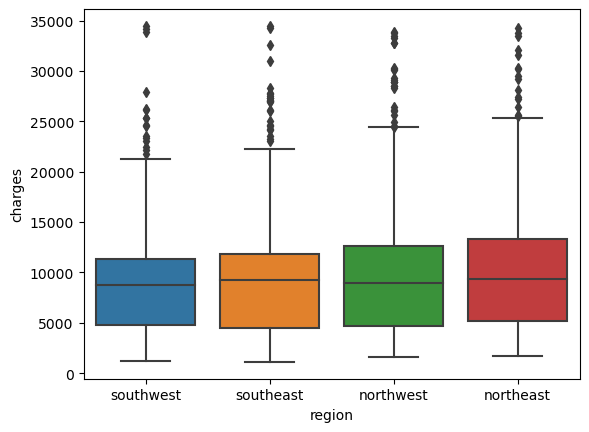

In [48]:
sns.boxplot(data=df, x='region', y='charges')

C:\Users\rames\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


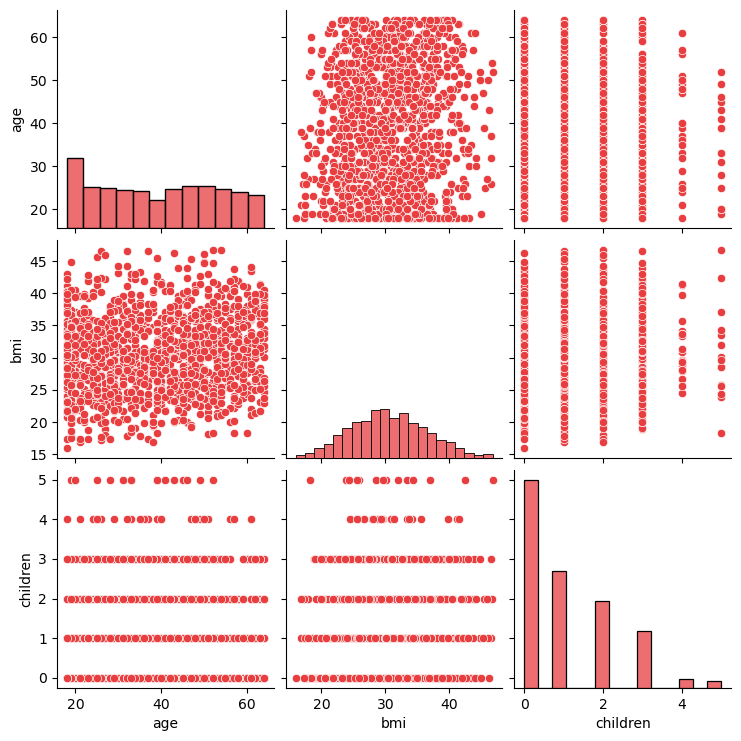

In [49]:
sns.set_palette(['#e83e40'])
X = ['age', 'bmi', 'children']
sns.pairplot(df[X])

<Axes: xlabel='sex'>

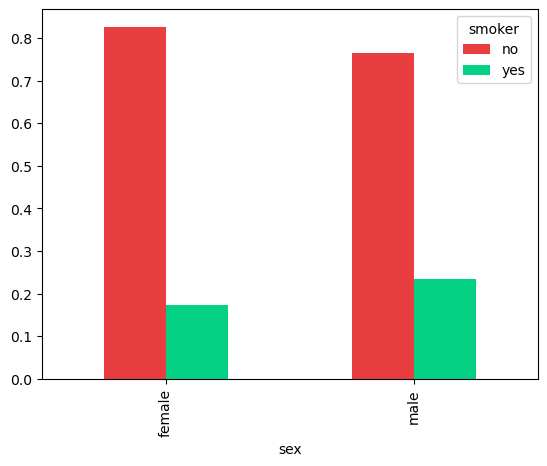

In [50]:
pair = pd.crosstab(df['sex'], df['smoker'], normalize='index')
pair.plot(kind='bar', color=["#e83e40", "#04d183"])

<Axes: xlabel='region'>

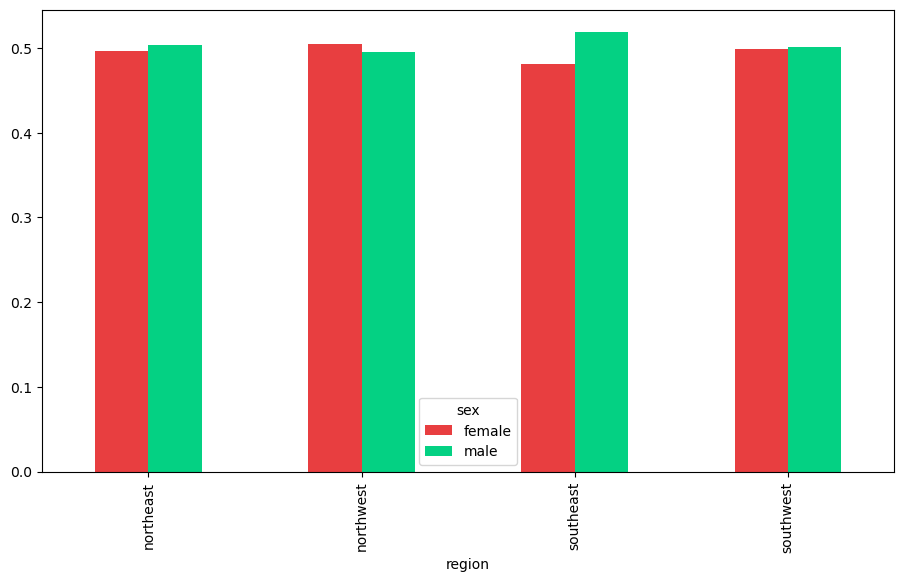

In [51]:
pair = pd.crosstab(df['region'], df['sex'], normalize='index')
pair.plot(kind='bar', color=["#e83e40", "#04d183"],figsize=(11,6))

<Axes: xlabel='region'>

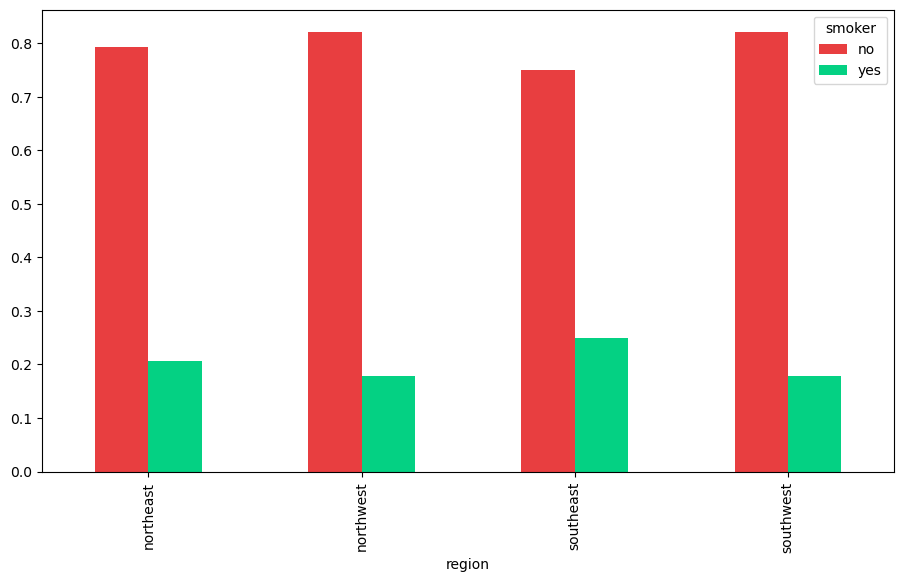

In [52]:
pair = pd.crosstab(df['region'], df['smoker'], normalize='index')
pair.plot(kind='bar', color=["#e83e40", "#04d183"],figsize=(11,6))

* This boxplot illustrates the wide range of healthcare insurance charges, ranging from 10,000 to 60,000.
* The boxplot indicates that individuals from the southeast region are paying a larger amount compared to those from other regions.

<Axes: >

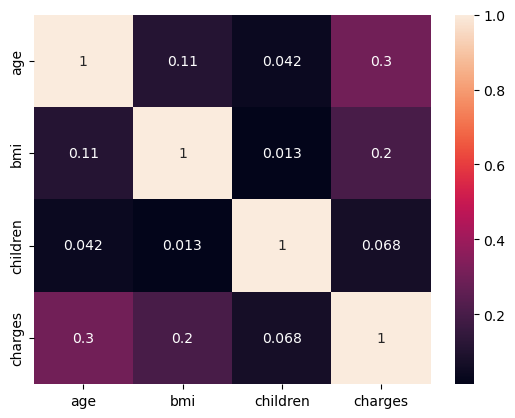

In [14]:
sns.heatmap(df.corr(numeric_only= True),annot=True)

* The relationship between age and charges postive correlation.If age increses charges also increses.

* The relationship between bmi and charges Negative correlation relationship.If bmi increses charges will be decreses.

* The relationship between children and charges postive weak relationship.If childeren increses charges also increses.

## sprint-3

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## segarate the input and output

In [15]:
df['children'] = df['children'].astype("object")

In [16]:
x = df.drop(columns='charges')

In [17]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [18]:
y = df['charges']

In [19]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Splitting Data into Train and Test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [22]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


In [23]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_num = x_train.select_dtypes(include=['int64','float64'])

In [24]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_num = x_test.select_dtypes(include=['int64','float64'])

In [25]:
x_train_cat.head()

,sex,children,smoker,region
1075,female,1,no,southeast
131,female,0,no,northeast
15,male,1,no,southwest
1223,female,0,yes,southeast
1137,female,0,no,northwest


## Applying Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
MinMaxScaler = MinMaxScaler()

In [28]:
x_train_num_transformed = pd.DataFrame(MinMaxScaler.fit_transform(x_train_num),
                                       columns = MinMaxScaler.get_feature_names_out(),
                                       index = x_train_num.index)

In [29]:
x_test_num_transformed = pd.DataFrame(MinMaxScaler.transform(x_test_num),
                                       columns = MinMaxScaler.get_feature_names_out(),
                                       index = x_test_num.index)

## Applying one hot encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe = OneHotEncoder(sparse_output=False)

In [32]:
x_train_cat_transformed = pd.DataFrame(ohe.fit_transform(x_train_cat),
                                       columns = ohe.get_feature_names_out(),
                                       index = x_train_cat.index)

In [33]:
x_test_cat_transformed = pd.DataFrame(ohe.transform(x_test_cat),
                                       columns = ohe.get_feature_names_out(),
                                       index = x_test_cat.index)

In [34]:
ohe.get_feature_names_out()

array(['sex_female', 'sex_male', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'], dtype=object)

## concatenation

In [35]:
x_train_transformed = pd.concat([x_train_num_transformed,x_train_cat_transformed], axis=1)

x_train_transformed.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1075,0.304348,0.366694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
131,0.934783,0.163573,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15,0.021739,0.232446,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1223,0.043478,0.227603,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1137,0.173913,0.168684,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [36]:
x_test_transformed = pd.concat([x_test_num_transformed,x_test_cat_transformed], axis=1)

x_test_transformed.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,0.739130,0.383105,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
610,0.630435,0.360775,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
569,0.652174,0.661959,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1034,0.934783,0.603175,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
198,0.717391,0.056228,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Model Building

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
regresion = LinearRegression()
regresion.fit(x_train_transformed, y_train)

LinearRegression()

In [39]:
y_test_pred = regresion.predict(x_test_transformed)

### Evalution

In [40]:
LR = metrics.mean_absolute_error(y_test_pred,y_test)
LR

3945.7353094895525

### Using KNN Regressor Algorithm

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
regressor = KNeighborsRegressor()

In [43]:
regressor.fit(x_train_transformed,y_train)

KNeighborsRegressor()

In [44]:
y_pred = regressor.predict(x_test_transformed)

### Evalution

In [45]:
KNN = metrics.mean_absolute_error(y_pred,y_test)
KNN

4099.397663

### Using DT Regressor Algorithm

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree = DecisionTreeRegressor()

In [48]:
tree.fit(x_train_transformed,y_train)

DecisionTreeRegressor()

In [49]:
y_pred1 = tree.predict(x_test_transformed)

### Evalution

In [50]:
DT = metrics.mean_absolute_error(y_pred1,y_test)
DT

3232.538561250746

### Using Random Forest Regressor Algorithm

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest = RandomForestRegressor()

In [53]:
forest.fit(x_train_transformed,y_train)

RandomForestRegressor()

In [54]:
y_pred2 = forest.predict(x_test_transformed)

### Evalution

In [55]:
RF = metrics.mean_absolute_error(y_pred2,y_test)
RF

2761.3431263350744

### support Vector Machines

In [56]:
from sklearn.svm import SVR

In [57]:
model = SVR()

In [58]:
model.fit(x_train_transformed,y_train)

SVR()

In [59]:
y_pred3 = model.predict(x_test_transformed)

## Evalution

In [60]:
SVM = metrics.mean_absolute_error(y_pred3,y_test)
SVM

8560.69856001287

### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.

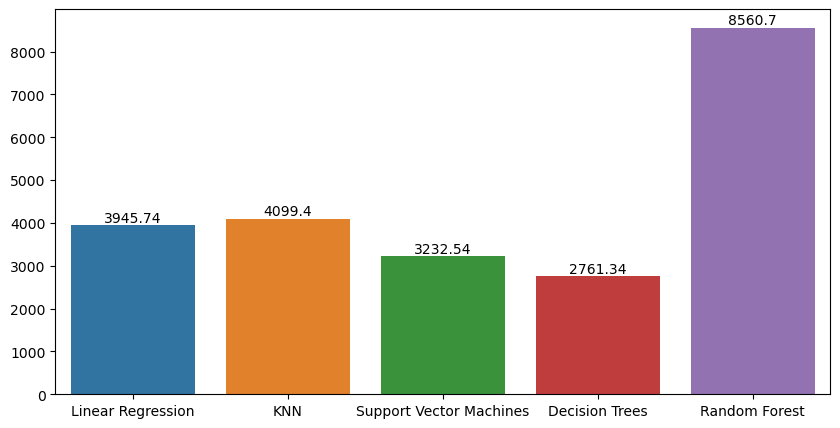

In [61]:
Algorithems = ['Linear Regression','KNN','Support Vector Machines','Decision Trees','Random Forest']
Accuracy = [LR,KNN,DT,RF,SVM]
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Algorithems,y = Accuracy)
ax.bar_label(ax.containers[0])
plt.show()
